#Install

In [ ]:
!pip install pandas

#Connection Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Read data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
train_truth = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/raw_data/train_truth.csv')
train_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157943 entries, 0 to 157942
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   enroll_id  157943 non-null  int64
 1   truth      157943 non-null  int64
dtypes: int64(2)
memory usage: 2.4 MB


In [8]:
test_truth = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/raw_data/test_truth.csv')
test_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67699 entries, 0 to 67698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   enroll_id  67699 non-null  int64
 1   truth      67699 non-null  int64
dtypes: int64(2)
memory usage: 1.0 MB


In [3]:
train_log = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/data_sau_xử_lý/train_log_processed.csv')
#Loại bỏ cột Unname: 0
train_log.drop(columns=['Unnamed: 0'], inplace=True)
train_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165540 entries, 0 to 29165539
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   enroll_id   int64 
 1   username    int64 
 2   course_id   object
 3   session_id  object
 4   action      object
 5   object      object
 6   time        object
dtypes: int64(2), object(5)
memory usage: 1.5+ GB


In [9]:
test_log = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/data_sau_xử_lý/test_log_processed.csv')
test_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12944862 entries, 0 to 12944861
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   enroll_id   int64 
 2   username    int64 
 3   course_id   object
 4   session_id  object
 5   action      object
 6   object      object
 7   time        object
dtypes: int64(3), object(5)
memory usage: 790.1+ MB


In [10]:
user_info = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/data_sau_xử_lý/user_info_processed.csv')
#Loại bỏ cột Unname: 0
user_info.drop(columns=['Unnamed: 0'], inplace=True)
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9627148 entries, 0 to 9627147
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    int64  
 1   gender     int64  
 2   education  object 
 3   birth      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 293.8+ MB


In [11]:
course_info = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/data_sau_xử_lý/course_info_processed.csv')
course_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   6410 non-null   int64 
 1   id           6410 non-null   object
 2   course_id    6410 non-null   object
 3   course_type  6410 non-null   int64 
 4   category     6410 non-null   object
 5   start_date   6410 non-null   object
 6   end_date     6410 non-null   object
 7   duration     6410 non-null   int64 
 8   start_tsp    6410 non-null   int64 
 9   end_tsp      6410 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 500.9+ KB


#Course Feature


In [ ]:
# Tổng số học viên bỏ học và không bỏ học trong file train_truth
train_truth['truth'].value_counts()

,count
truth,
1,119817
0,38126


In [ ]:
# Tổng số khóa học trong file train_log
num_unique_courses = train_log['course_id'].nunique()
num_unique_courses

247

In [ ]:
# Tổng số khóa học trong file course_info
num_unique_courses = course_info['course_id'].nunique()
num_unique_courses

6410

##Số lượng học viên và tỉ lệ bỏ học


In [ ]:
latest_train_log = train_log.groupby('enroll_id')['time'].max().reset_index()
latest_train_log.columns = ['enroll_id','latest_date']
course_train = pd.merge(latest_train_log, train_log[['enroll_id','course_id']].drop_duplicates(), on='enroll_id', how='left')
course_train

,enroll_id,latest_date,course_id
0,772,2015-09-27,course-v1:TsinghuaX+70800232X+2015_T2
1,773,2015-10-19,course-v1:TsinghuaX+70800232X+2015_T2
2,774,2015-10-29,course-v1:TsinghuaX+70800232X+2015_T2
3,776,2015-10-25,course-v1:TsinghuaX+70800232X+2015_T2
4,777,2015-10-05,course-v1:TsinghuaX+70800232X+2015_T2
...,...,...,...
157938,466774,2016-03-27,course-v1:TsinghuaX+AP000001X+2016_T1
157939,466776,2016-03-20,course-v1:TsinghuaX+AP000001X+2016_T1
157940,466781,2016-04-02,course-v1:TsinghuaX+AP000001X+2016_T1
157941,466782,2016-03-06,course-v1:TsinghuaX+AP000001X+2016_T1


In [ ]:
course_train = course_train.sort_values(by=['course_id', 'latest_date'])
# Tạo cột đếm số lượng học viên trước thời điểm latest_date của mỗi enroll_id
course_train['previous_enroll_num'] = course_train.groupby('course_id').cumcount()
course_train

,enroll_id,latest_date,course_id,previous_enroll_num
33047,96783,2015-09-08,CAU/08112500x/2015_T2,0
33096,96906,2015-09-08,CAU/08112500x/2015_T2,1
33153,97041,2015-09-08,CAU/08112500x/2015_T2,2
33220,97202,2015-09-08,CAU/08112500x/2015_T2,3
33259,97313,2015-09-08,CAU/08112500x/2015_T2,4
...,...,...,...,...
145102,432341,2016-03-28,course-v1:ustcX+USTC001+_,479
145107,432346,2016-03-28,course-v1:ustcX+USTC001+_,480
145155,432449,2016-03-28,course-v1:ustcX+USTC001+_,481
145163,432468,2016-03-28,course-v1:ustcX+USTC001+_,482


In [ ]:
course_train = pd.merge(course_train, train_truth, on='enroll_id', how='left')
course_train

,enroll_id,latest_date,course_id,previous_enroll_num,truth
0,96783,2015-09-08,CAU/08112500x/2015_T2,0,1
1,96906,2015-09-08,CAU/08112500x/2015_T2,1,1
2,97041,2015-09-08,CAU/08112500x/2015_T2,2,1
3,97202,2015-09-08,CAU/08112500x/2015_T2,3,1
4,97313,2015-09-08,CAU/08112500x/2015_T2,4,1
...,...,...,...,...,...
157938,432341,2016-03-28,course-v1:ustcX+USTC001+_,479,0
157939,432346,2016-03-28,course-v1:ustcX+USTC001+_,480,1
157940,432449,2016-03-28,course-v1:ustcX+USTC001+_,481,0
157941,432468,2016-03-28,course-v1:ustcX+USTC001+_,482,1


In [ ]:
course_train = course_train.sort_values(by=['course_id', 'latest_date'])

# Tạo cột đếm số lượng học viên bỏ học trước thời điểm latest_date của mỗi enroll_id
# Sử dụng hàm cumcount() để đếm số lượng truth = 1 trước latest_date
course_train['previous_dropout_user_num'] = (
    course_train.groupby('course_id')['truth']
    .apply(lambda x: x.cumsum().shift(1).fillna(0))
    .reset_index(level=0, drop=True)
)
course_train['previous_dropout_user_num'] = course_train['previous_dropout_user_num'].astype(int)
course_train

,enroll_id,latest_date,course_id,previous_enroll_num,truth,previous_dropout_user_num
0,96783,2015-09-08,CAU/08112500x/2015_T2,0,1,0
1,96906,2015-09-08,CAU/08112500x/2015_T2,1,1,1
2,97041,2015-09-08,CAU/08112500x/2015_T2,2,1,2
3,97202,2015-09-08,CAU/08112500x/2015_T2,3,1,3
4,97313,2015-09-08,CAU/08112500x/2015_T2,4,1,4
...,...,...,...,...,...,...
157938,432341,2016-03-28,course-v1:ustcX+USTC001+_,479,0,422
157939,432346,2016-03-28,course-v1:ustcX+USTC001+_,480,1,422
157940,432449,2016-03-28,course-v1:ustcX+USTC001+_,481,0,423
157941,432468,2016-03-28,course-v1:ustcX+USTC001+_,482,1,423


In [ ]:

course_train['latest_date'] = pd.to_datetime(course_train['latest_date'])

max_per_course = course_train.loc[course_train.groupby('course_id')['latest_date'].idxmax()].reset_index()
max_per_course.drop(columns=['index'], inplace=True)
max_per_course

,enroll_id,latest_date,course_id,previous_enroll_num,truth,previous_dropout_user_num
0,96789,2015-10-13,CAU/08112500x/2015_T2,284,1,231
1,240564,2015-08-08,MITx/15_390x_2015_T1/2015_T1,525,1,439
2,295904,2016-10-14,MITx/6_041x/2014_T2,404,0,362
3,182497,2015-10-28,NCTU/nctucmpsd/2015_T2,353,0,330
4,180998,2015-10-29,TsinghuaX/00680082X/2016_T1,437,0,313
...,...,...,...,...,...,...
242,382263,2016-01-09,course-v1:UQx+Write101_x+2015_T2,351,0,316
243,136793,2015-08-05,course-v1:UST+UST001+_,367,0,302
244,464923,2016-04-21,course-v1:songshuhui+SSH001+_,331,0,279
245,434370,2015-10-31,course-v1:ustcX+LB05203a+2015_T2,282,0,241


In [ ]:
max_per_course = pd.merge(max_per_course, course_info[['course_id', 'duration']], on='course_id', how='left')
max_per_course

,enroll_id,latest_date,course_id,previous_enroll_num,truth,previous_dropout_user_num,duration
0,96789,2015-10-13,CAU/08112500x/2015_T2,284,1,231,297
1,240564,2015-08-08,MITx/15_390x_2015_T1/2015_T1,525,1,439,74
2,295904,2016-10-14,MITx/6_041x/2014_T2,404,0,362,91
3,182497,2015-10-28,NCTU/nctucmpsd/2015_T2,353,0,330,84
4,180998,2015-10-29,TsinghuaX/00680082X/2016_T1,437,0,313,131
...,...,...,...,...,...,...,...
242,382263,2016-01-09,course-v1:UQx+Write101_x+2015_T2,351,0,316,84
243,136793,2015-08-05,course-v1:UST+UST001+_,367,0,302,89
244,464923,2016-04-21,course-v1:songshuhui+SSH001+_,331,0,279,106
245,434370,2015-10-31,course-v1:ustcX+LB05203a+2015_T2,282,0,241,126


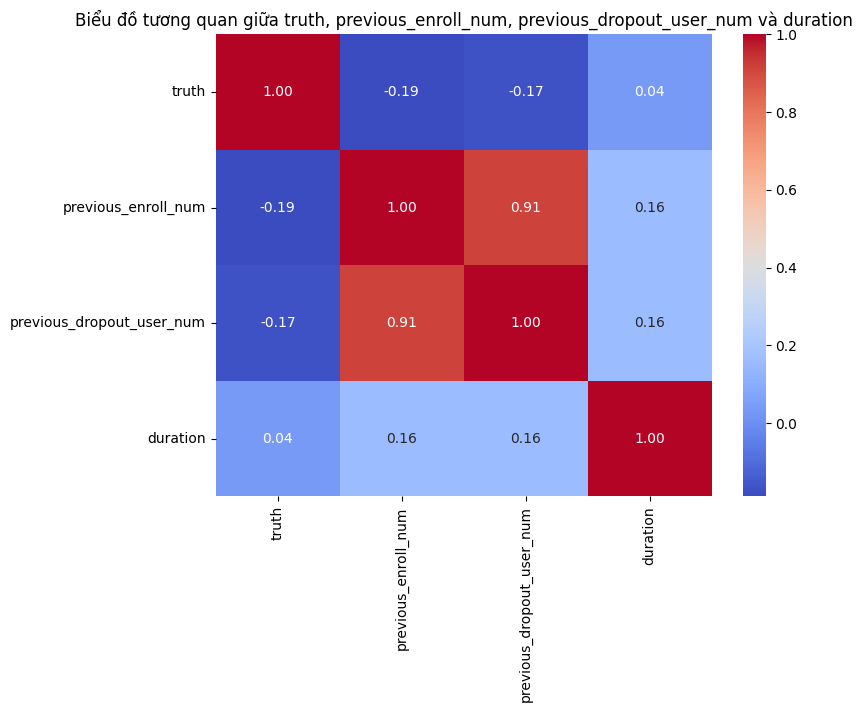

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính ma trận tương quan
corr_matrix = max_per_course[['truth','previous_enroll_num', 'previous_dropout_user_num', 'duration']].corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(8, 6))  # Điều chỉnh kích thước biểu đồ nếu cần
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Biểu đồ tương quan giữa truth, previous_enroll_num, previous_dropout_user_num và duration')
plt.show()

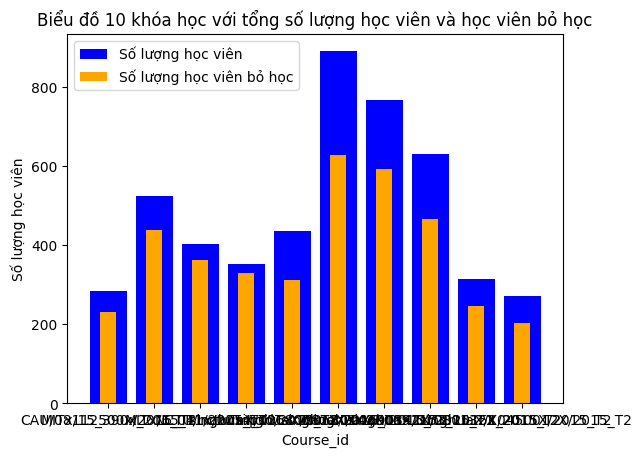

In [ ]:
df_top10 = max_per_course.head(10)

fig, ax = plt.subplots()

# Vẽ previous_enroll_num với màu xanh
ax.bar(df_top10['course_id'], df_top10['previous_enroll_num'], label='Số lượng học viên', color='blue')

# Vẽ previous_dropout_user_num với màu cam và độ lệch 0.35 so với cột previous_enroll_num
ax.bar(df_top10['course_id'], df_top10['previous_dropout_user_num'], label='Số lượng học viên bỏ học', color='orange', width=0.35)

ax.set_xlabel('Course_id')
ax.set_ylabel('Số lượng học viên')
ax.set_title('Biểu đồ 10 khóa học với tổng số lượng học viên và học viên bỏ học')
ax.legend()
plt.show()

# User Feature


In [ ]:
# Tổng số học viên bỏ học và không bỏ học trong file train_truth
train_truth['truth'].value_counts()

,count
truth,
1,119817
0,38126


In [13]:
#Lấy các user từ file train và loại bỏ trùng lặp

user_from_train = train_log[['enroll_id', 'username']]
user_from_train = user_from_train.drop_duplicates()

# Lấy các user có bỏ học có truth = 1
user = pd.merge(user_from_train, train_truth,on='enroll_id', how='inner')
user_dropout = user.loc[user['truth'] == 1]
#user_nondropout = user.loc[user['truth'] == 0]

# Merge với user_info để lấy thông tin người dùng
user_dropout = user_dropout[['enroll_id','username']]
user_dropout = pd.merge(user_info, user_dropout,left_on='user_id', right_on='username', how='inner')
user_dropout = user_dropout.drop(columns=['username'])
user_dropout

,user_id,gender,education,birth,enroll_id
0,1102182,0,High,1997.0,53933
1,571874,1,Bachelor's,1997.0,16027
2,571874,1,Bachelor's,1997.0,35312
3,571874,1,Bachelor's,1997.0,102075
4,571874,1,Bachelor's,1997.0,441112
...,...,...,...,...,...
119812,463095,0,High,2010.0,281719
119813,463095,0,High,2010.0,326553
119814,463095,0,High,2010.0,364419
119815,463095,0,High,2010.0,431779


## Education


In [ ]:
counts = user_dropout['education'].value_counts()
counts

,count
education,
Bachelor's,63865
Master's,20599
High,17771
Associate,11862
Doctorate,3190
Middle,2062
Primary,468


Vẽ biểu đồ cột


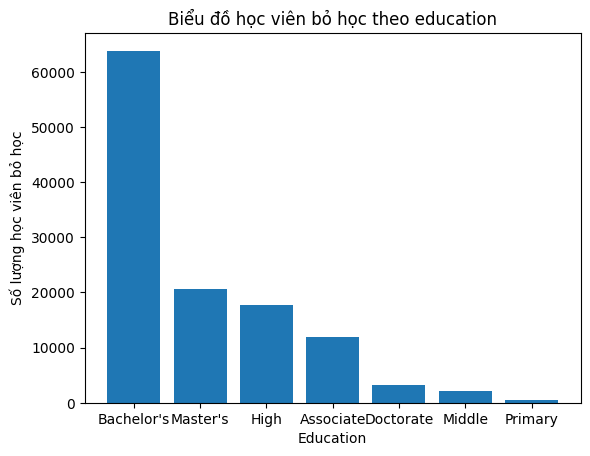

In [ ]:
plt.bar(counts.index, counts.values)
plt.xlabel('Education')
plt.ylabel('Số lượng học viên bỏ học')
plt.title('Biểu đồ học viên bỏ học theo education')
plt.show()

Qua biểu đồ trên ta có thể thấy được tầm ảnh hưởng của education đến kết quả dự đoán bỏ học của học viên, cấp bậc education càng cao tỉ lệ bỏ học càng cao

## Age


In [ ]:
#Xác định lần cuối cùng truy cập khóa học của người dùng
latest_train_log = train_log.groupby('enroll_id')['time'].max().reset_index()
latest_train_log.columns = ['enroll_id','latest_date']
latest_train_log

,enroll_id,latest_date
0,772,2015-09-27
1,773,2015-10-19
2,774,2015-10-29
3,776,2015-10-25
4,777,2015-10-05
...,...,...
157938,466774,2016-03-27
157939,466776,2016-03-20
157940,466781,2016-04-02
157941,466782,2016-03-06


In [ ]:
# Tính tuổi của học viên lúc đăng ký

age_features = pd.merge(user_dropout, latest_train_log,left_on='user_id', right_on='enroll_id', how='inner')
# Hàm chuyển datetime thành int
def tinh_tuoi(row):
    row = pd.to_datetime(row)
    tuoi = row.dt.year
    return tuoi
# Lấy thời gian lần cuối truy cập trừ đi năm sinh để lấy được độ tuổi
age_features['age'] = tinh_tuoi(age_features['latest_date']) - age_features['birth']
age_features = age_features['age']
age_features

,age
0,19.0
1,18.0
2,18.0
3,18.0
4,18.0
...,...
10350,27.0
10351,27.0
10352,27.0
10353,27.0


In [ ]:
# Lấy giá trị tuổi tăng dần
counts = age_features.value_counts()
counts.sort_index(inplace=True)

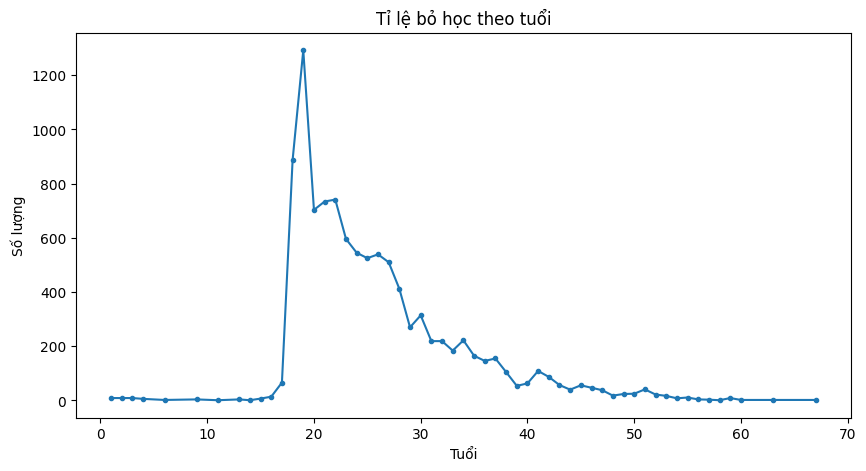

In [ ]:
# Vẽ biểu đồ đường
plt.figure(figsize=(10, 5))
plt.plot(counts.index, counts.values, marker='.')

# Thêm tiêu đề và nhãn
plt.title('Tỉ lệ bỏ học theo tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()



Nhìn vào biểu đồ ta có thể thấy nếu từ độ tuổi 15-40 có tỉ lệ bỏ học cao nhất, từ đó ta có thể trích xuất đặc trưng này

## Gender


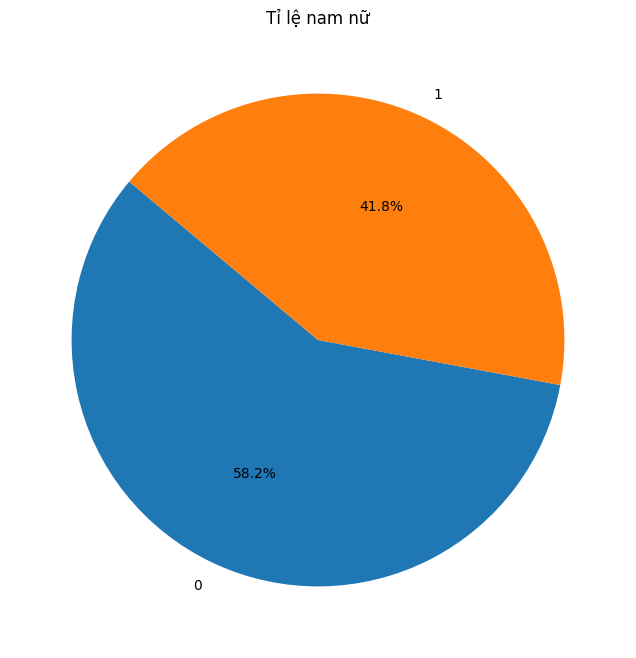

In [ ]:
counts = user_dropout['gender'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỉ lệ nam nữ')
plt.show()

## prev_dropout_num


Trong phần này, nhóm sẽ kiểm tra xem tỉ lệ bỏ học của học viên  đã từng bỏ học nhiều lần. Để tính được nhóm sẽ tính tổng số khoá học mà sinh viên đã bỏ học trước đó(Tính cả khoá học hiện tại) sau đó trừ đi khoá học hiện tại của sinh viên đang đăng ký học, để có được giá trị sau cùng là tổng số khoá học mà sinh viên đã bỏ học trước đó(không tính khoá học hiện tại)

In [5]:
# Kết các bảng lại để lấy được các thông tin cần thiết
num_dropout = pd.merge(user_dropout, latest_train_log, on='enroll_id', how='inner')
num_dropout = pd.merge(num_dropout, train_truth, on='enroll_id', how='inner')

# Sắp xếp thời gian tăng dần
num_dropout = num_dropout.sort_values('latest_date', ascending=True)

# Tính tổng số khoá học đã bỏ trước đó(Tính cả khoá học hiện tại )
num_dropout['drop'] = num_dropout.groupby('user_id')['truth'].cumsum()

# Tạo cột để lưu trữ giá trị bỏ học trước đó (Không tính đến khoá học hiện tại)
num_dropout['prev_dropout_num'] = 0

# Tính tổng số khoá học đã bỏ trước đó(Không tính khoá học hiện tại )
num_dropout['prev_dropout_num'] = num_dropout['drop'].where( num_dropout['truth'] == 0, num_dropout['drop'] - 1)
num_dropout = num_dropout.drop('drop',axis=1)


NameError: name 'user_dropout' is not defined

Check kết quả

In [ ]:
_ = num_dropout[num_dropout['prev_dropout_num'] == 100]
_

,user_id,gender,education,birth,enroll_id,latest_date,truth,prev_dropout_num
91545,491129,0,Bachelor's,1987.0,287676,2017-05-26,1,100


In [ ]:
_ = train_log[train_log['username']==491129]
_ = _[['enroll_id']].drop_duplicates()
_ = pd.merge(_, train_truth, on='enroll_id', how='inner')
_ = _[_['truth']==1]
_

,enroll_id,truth
1,3147,1
3,6902,1
4,7758,1
7,14377,1
8,16827,1
...,...,...
143,438202,1
144,445886,1
145,452379,1
146,456888,1


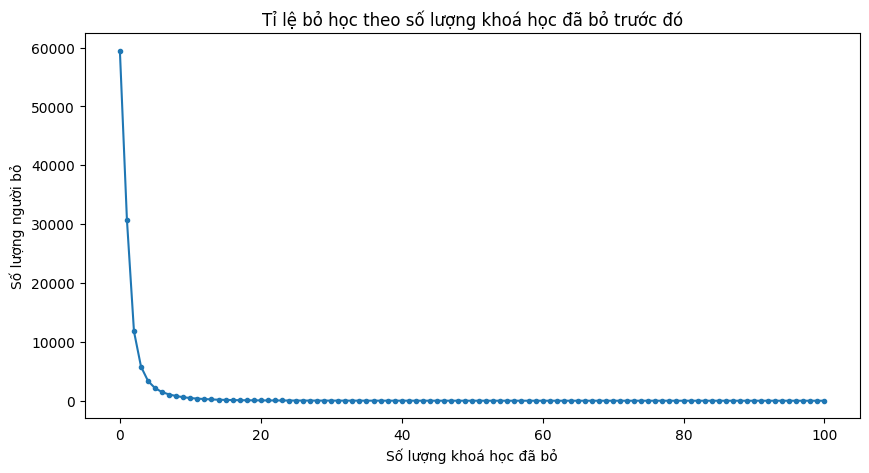

In [ ]:
counts = num_dropout['prev_dropout_num'].value_counts()
counts.sort_index(inplace=True)

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 5))
plt.plot(counts.index, counts.values, marker='.')

# Thêm tiêu đề và nhãn
plt.title('Tỉ lệ bỏ học theo số lượng khoá học đã bỏ trước đó')
plt.xlabel('Số lượng khoá học đã bỏ')
plt.ylabel('Số lượng người bỏ')

# Hiển thị biểu đồ
plt.show()

Qua biểu đồ trên, ta có thể thấy được, với những người từng bỏ học dưới 5 lần rất cao, có thể là những người trải nghiệm hoặc khoá học không thích hợp rồi bỏ. Từ đó, với tỉ lệ này ta có thể trích xuất đặc trưng.

#Log feature

## Session

In [14]:
# Lấy tổng số lần session của các sinh viên bỏ học
session_num = train_log.groupby('enroll_id')['session_id'].nunique().reset_index()
session_num.columns = ['enroll_id', 'session_num']
session_num = pd.merge(session_num, user_dropout, on='enroll_id', how='inner')
counts = session_num.value_counts('session_num')
counts.head(5)

,count
session_num,
1,84452
2,19923
3,7461
4,3436
5,1773


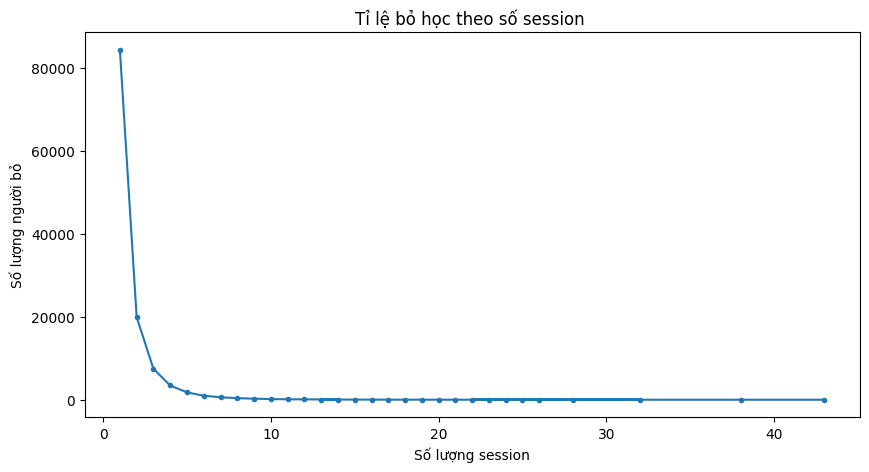

In [15]:
# Vẽ biểu đồ đường
plt.figure(figsize=(10, 5))
plt.plot(counts.index, counts.values, marker='.')

# Thêm tiêu đề và nhãn
plt.title('Tỉ lệ bỏ học theo số session ')
plt.xlabel('Số lượng session')
plt.ylabel('Số lượng người bỏ')

# Hiển thị biểu đồ
plt.show()

Qua biểu đồ ta có thể thấy, học viên có càng ít phiên đăng nhập vào để học bài thì tỉ lệ bỏ học càng cao

## Video

In [16]:
#Lọc ra các action có từ 'video'
video_actions_train = train_log[train_log['action'].str.contains('video')]
#Lấy số lần tương tác với video theo enroll_id
video_num_train = video_actions_train.groupby('enroll_id').size().reset_index(name='video_num')

#Lấy tất cả enroll_id bỏ học
enroll_ids_train = user_dropout[['enroll_id']].drop_duplicates()
# Điền giá trị video = 0 cho các enroll_id không có action video
video_num_train = pd.merge(enroll_ids_train, video_num_train, on='enroll_id', how='left').fillna(0)
video_num_train['video_num'] = video_num_train['video_num'].astype(int)
video_num_train.head(5)

,enroll_id,video_num
0,53933,44
1,16027,0
2,35312,21
3,102075,0
4,441112,56


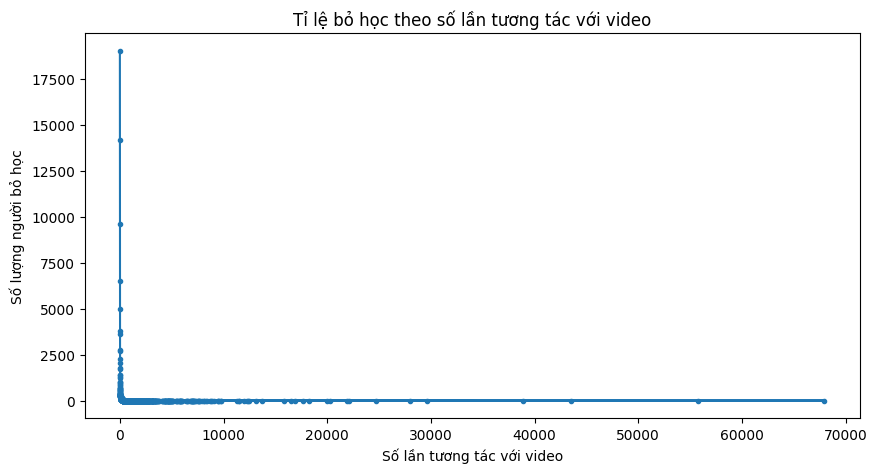

In [17]:
# Xét video_num tăng dần
video_num_train = video_num_train.sort_values(by=['video_num'])
counts = video_num_train['video_num'].value_counts()

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 5))
plt.plot(counts.index, counts.values, marker='.')

# Thêm tiêu đề và nhãn
plt.title('Tỉ lệ bỏ học theo số lần tương tác với video')
plt.xlabel('Số lần tương tác với video')
plt.ylabel('Số lượng người bỏ học')

# Hiển thị biểu đồ
plt.show()

## Courseware

In [18]:
# Lấy tất cả các hành động
courseware_actions_train = train_log[train_log['action'].str.contains('courseware')]
# Đếm số lần tương tác với giáo trình theo enroll_id
courseware_num_train = courseware_actions_train.groupby('enroll_id').size().reset_index(name='courseware_num')
# Điền giá trị bằng 0 cho các enroll_id không có hành động với giáo trình
courseware_num_train = pd.merge(user_dropout, courseware_num_train, on='enroll_id', how='left').fillna(0)
courseware_num_train['courseware_num'] = courseware_num_train['courseware_num'].astype(int)
courseware_num_train.head(5)

,user_id,gender,education,birth,enroll_id,courseware_num
0,1102182,0,High,1997.0,53933,6
1,571874,1,Bachelor's,1997.0,16027,1
2,571874,1,Bachelor's,1997.0,35312,15
3,571874,1,Bachelor's,1997.0,102075,6
4,571874,1,Bachelor's,1997.0,441112,35


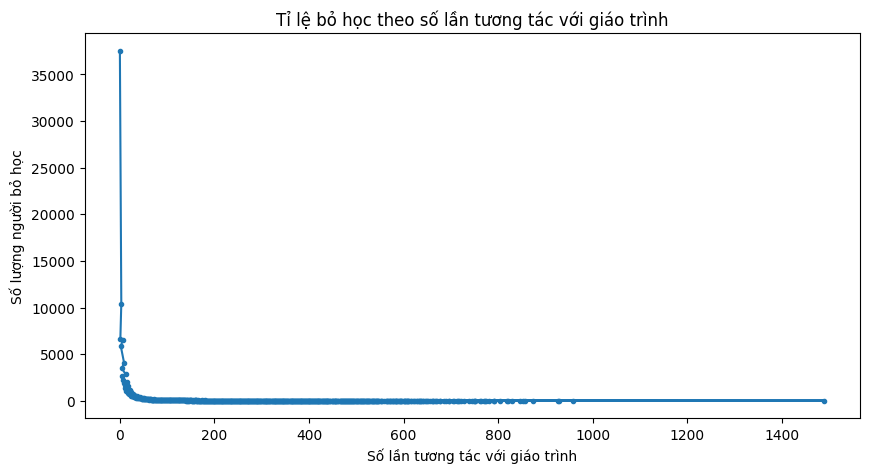

In [19]:
# Xét số lần tương tác với giáo trình tăng dần
courseware_num_train = courseware_num_train.sort_values(by=['courseware_num'])
counts = courseware_num_train['courseware_num'].value_counts()

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 5))
plt.plot(counts.index, counts.values, marker='.')

# Thêm tiêu đề và nhãn
plt.title('Tỉ lệ bỏ học theo số lần tương tác với giáo trình')
plt.xlabel('Số lần tương tác với giáo trình')
plt.ylabel('Số lượng người bỏ học')

# Hiển thị biểu đồ
plt.show()

#Xây dựng bộ dữ liệu kết hợp từ course_info, train_truth, train_log

In [ ]:
course_info = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/raw_data/course_info.csv')
train_truth = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/raw_data/train_truth.csv')
train_log = pd.read_csv('/content/drive/MyDrive/Nhóm 11/Đồ án môn học/Technology/raw_data/train_log.csv')

##course_info

In [ ]:
#Chuyển cột start và end sang dạng datetime
course_info['start'] = pd.to_datetime(course_info['start'])
course_info['end'] = pd.to_datetime(course_info['end'])

In [ ]:
course_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           6410 non-null   object        
 1   course_id    6410 non-null   object        
 2   start        6410 non-null   datetime64[ns]
 3   end          5877 non-null   datetime64[ns]
 4   course_type  6410 non-null   int64         
 5   category     1454 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 300.6+ KB


In [ ]:
course_info.describe()

,start,end,course_type
count,6410,5877,6410.000000
mean,2016-09-14 00:40:20.377535232,2017-04-09 06:50:41.807044352,0.083151
min,2010-01-01 08:00:00,2013-12-29 16:00:00,0.000000
25%,2016-02-22 09:00:00,2016-07-09 00:00:00,0.000000
50%,2016-10-31 08:00:00,2017-03-12 23:30:00,0.000000
75%,2017-03-31 08:00:00,2017-08-16 23:30:00,0.000000
max,2037-01-16 08:00:00,2066-01-01 00:00:00,1.000000
std,NaN,NaN,0.276132


###start

In [ ]:
# Chia dữ liệu thành hai nhóm dựa trên điều kiện start
condition = ((course_info['start'] < '2015-08-01') | (course_info['start'] > '2017-08-31'))
course_start_error = course_info.loc[condition]
course_start_ok = course_info.loc[~condition]

# Tìm trung vị của course_start_ok
median_start = course_start_ok['start'].median()

# Điền giá trị start của course_start_error thành trung vị của course_start_ok
course_info.loc[condition, 'start'] = median_start

In [ ]:
course_info.describe()

,start,end,course_type
count,6410,5877,6410.000000
mean,2016-10-21 15:15:40.455537920,2017-04-09 06:50:41.807044352,0.083151
min,2015-08-01 08:00:00,2013-12-29 16:00:00,0.000000
25%,2016-08-08 00:00:00,2016-07-09 00:00:00,0.000000
50%,2016-11-30 08:00:00,2017-03-12 23:30:00,0.000000
75%,2017-02-21 08:00:00,2017-08-16 23:30:00,0.000000
max,2017-08-28 08:00:00,2066-01-01 00:00:00,1.000000
std,NaN,NaN,0.276132


In [ ]:
course_info['duration'] = course_info.end - course_info.start

median_duration = course_info.duration.median()
median_duration = pd.to_timedelta(median_duration, unit='ns')  # Convert to timedelta64[ns]

In [ ]:
print("Trung vị của khoảng thời gian học: ", median_duration)

Trung vị của khoảng thời gian học:  114 days 15:00:00


In [ ]:
#Điền giá trị NaN ở cột 'end' bằng giá trị của cột 'start' + 'median_duration'
course_info['end'] = course_info['end'].fillna(course_info['start'] + median_duration)

In [ ]:
course_info.end.isnull().sum()

0

###end

In [ ]:
# Chia dữ liệu thành hai nhóm dựa trên điều kiện start
condition_end = ((course_info['end'] < '2015-08-01') | (course_info['end'] > '2024-08-31'))
course_end_error = course_info.loc[condition_end]
course_end_ok = course_info.loc[~condition_end]

# Tìm trung vị của course_end_ok
median_end = course_end_ok['end'].median()

# Điền giá trị end của course_end_error thành trung vị của course_end_ok
course_info.loc[condition_end, 'end'] = median_end

In [ ]:
#Tìm các mẫu có cột 'end' nhỏ hơn cột 'start'
condition_end_error2 = course_info['end'] < course_info['start']
course_end_error2 = course_info.loc[condition_end_error2]

# Sửa giá trị của 'end' trong df_end_error_2 thành 'start' + median_duration
course_info.loc[condition_end_error2, 'end'] = course_end_error2['start'] + median_duration

In [ ]:
course_info.describe()

,start,end,course_type,duration
count,6410,6410,6410.000000,5877
mean,2016-10-21 15:15:40.455537920,2017-05-03 22:26:57.725428992,0.083151,172 days 13:58:09.872383870
min,2015-08-01 08:00:00,2015-08-20 00:00:00,0.000000,-1067 days +08:00:00
25%,2016-08-08 00:00:00,2016-12-02 08:00:00,0.000000,60 days 11:30:00
50%,2016-11-30 08:00:00,2017-03-30 23:00:00,0.000000,114 days 15:00:00
75%,2017-02-21 08:00:00,2017-08-04 08:00:00,0.000000,209 days 16:00:00
max,2017-08-28 08:00:00,2021-02-20 23:30:00,1.000000,18222 days 16:00:00
std,NaN,NaN,0.276132,570 days 18:23:13.703302096


In [ ]:
course_info['duration'].isnull().sum()

533

In [ ]:
course_info['duration'] = course_info['end'] - course_info['start']

In [ ]:
course_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   id           6410 non-null   object         
 1   course_id    6410 non-null   object         
 2   start        6410 non-null   datetime64[ns] 
 3   end          6410 non-null   datetime64[ns] 
 4   course_type  6410 non-null   int64          
 5   category     1454 non-null   object         
 6   duration     6410 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(3), timedelta64[ns](1)
memory usage: 350.7+ KB


In [ ]:
#Kiểm tra duration có giá trị âm không
if (course_info['duration'] < pd.Timedelta(0)).any():
  print("Có giá trị âm")
else:
  print("Không có giá trị âm")

Không có giá trị âm


In [ ]:
course_info.describe()

,start,end,course_type,duration
count,6410,6410,6410.000000,6410
mean,2016-10-21 15:15:40.455537920,2017-05-03 22:26:57.725428992,0.083151,194 days 07:11:17.269890796
min,2015-08-01 08:00:00,2015-08-20 00:00:00,0.000000,0 days 00:00:00
25%,2016-08-08 00:00:00,2016-12-02 08:00:00,0.000000,92 days 00:00:00
50%,2016-11-30 08:00:00,2017-03-30 23:00:00,0.000000,114 days 15:00:00
75%,2017-02-21 08:00:00,2017-08-04 08:00:00,0.000000,181 days 00:00:00
max,2017-08-28 08:00:00,2021-02-20 23:30:00,1.000000,1952 days 16:00:00
std,NaN,NaN,0.276132,223 days 09:10:26.620446692


###category

In [ ]:
course_info.isnull().sum()

,0
id,0
course_id,0
start,0
end,0
course_type,0
category,4956
duration,0


In [ ]:
course_info.category.nunique()

18

In [ ]:
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Mã hóa cột 'category'
course_info.category = label_encoder.fit_transform(course_info['category'])

In [ ]:
# In ra các giá trị gán cho từng nhóm dữ liệu
print("Bảng ánh xạ giá trị gốc và giá trị mã hóa:")
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)

Bảng ánh xạ giá trị gốc và giá trị mã hóa:
{'art': 0, 'biology': 1, 'business': 2, 'chemistry': 3, 'computer': 4, 'economics': 5, 'education': 6, 'electrical': 7, 'engineering': 8, 'environment': 9, 'foreign language': 10, 'history': 11, 'literature': 12, 'math': 13, 'medicine': 14, 'philosophy': 15, 'physics': 16, 'social science': 17, nan: 18}


In [ ]:
##Chấp nhận giữ lại giá trị NaN (NaN thành số 18)
course_info['category'].head(10)

,category
0,18
1,18
2,18
3,18
4,18
5,18
6,18
7,18
8,15
9,18


In [ ]:
course_info['category'].nunique()

19

**Vì chấp nhận giá trị NaN nên đã tăng lên 1 đơn vị. Cột category hiện tại gồm 19 giá trị khác nhau**

In [ ]:
course_info.isnull().sum()

,0
id,0
course_id,0
start,0
end,0
course_type,0
category,0
duration,0


In [ ]:
course_info.describe()

,start,end,course_type,category,duration
count,6410,6410,6410.000000,6410.000000,6410
mean,2016-10-21 15:15:40.455537920,2017-05-03 22:26:57.725428992,0.083151,15.778315,194 days 07:11:17.269890796
min,2015-08-01 08:00:00,2015-08-20 00:00:00,0.000000,0.000000,0 days 00:00:00
25%,2016-08-08 00:00:00,2016-12-02 08:00:00,0.000000,18.000000,92 days 00:00:00
50%,2016-11-30 08:00:00,2017-03-30 23:00:00,0.000000,18.000000,114 days 15:00:00
75%,2017-02-21 08:00:00,2017-08-04 08:00:00,0.000000,18.000000,181 days 00:00:00
max,2017-08-28 08:00:00,2021-02-20 23:30:00,1.000000,18.000000,1952 days 16:00:00
std,NaN,NaN,0.276132,4.782033,223 days 09:10:26.620446692


In [ ]:
# Tính toán IQR cho cột dữ liệu
# Dòng này tính toán điểm phần tư thứ nhất (Q1) của cột 'duration' trong DataFrame course_info.
Q1 = course_info['duration'].quantile(0.25)

# Dòng này tính toán điểm phần tư thứ ba (Q3) của cột 'duration' trong DataFrame course_info.
Q3 = course_info['duration'].quantile(0.75)

# Dòng này tính toán khoảng cách giữa phần tư (IQR) bằng cách lấy Q3 trừ đi Q1. IQR là một thước đo độ phân tán của dữ liệu.
IQR = Q3 - Q1

# Phát hiện các ngoại lai
outliers = ((course_info['duration'] < (Q1 - 1.5 * IQR)) | (course_info['duration'] > (Q3 + 1.5 * IQR)))

# Hiển thị các điểm ngoại lai
outlier_points = course_info[outliers]
print(outlier_points)


         id                          course_id               start  \
2      9433               course-v1:ZK+06093+J 2016-11-30 08:00:00   
5      7645       course-v1:ANUx+EBM05x+3T2017 2016-11-30 08:00:00   
10     3814      course-v1:CIE+CXST001+2015_T2 2015-12-30 00:00:00   
18    11105     course-v1:HKUx+HKU06.1x+3T2017 2016-11-30 08:00:00   
26    10171       course-v1:DelftX+PV2x+3T2017 2016-11-30 08:00:00   
...     ...                                ...                 ...   
6393  11153       course-v1:ASUx+EXW100x+2177B 2016-11-30 08:00:00   
6395  11064    course-v1:SDJTU+070203A+2017_T1 2017-03-01 08:00:00   
6400  11591  course-v1:MEPhIx+MEPHI006x+2T2017 2017-06-15 08:00:00   
6402   2817        course-v1:neu+SE001+2015_T2 2015-09-14 08:00:00   
6407   4184   course-v1:nttec+10610204+2015_T2 2015-12-07 00:00:00   

                     end  course_type  category           duration  
2    2020-01-01 00:00:00            0        18 1126 days 16:00:00  
5    2018-09-17 08:00

In [ ]:
# Tính giá trị trung vị của cột 'duration'
median_duration = course_info['duration'].median()
print(median_duration)

114 days 15:00:00


In [ ]:
# Thay thế các điểm ngoại lai bằng giá trị trung vị
course_info.loc[outliers, 'duration'] = median_duration

In [ ]:
course_info.describe()

,start,end,course_type,category,duration
count,6410,6410,6410.000000,6410.000000,6410
mean,2016-10-21 15:15:40.455537920,2017-05-03 22:26:57.725428992,0.083151,15.778315,112 days 18:10:37.123244930
min,2015-08-01 08:00:00,2015-08-20 00:00:00,0.000000,0.000000,0 days 00:00:00
25%,2016-08-08 00:00:00,2016-12-02 08:00:00,0.000000,18.000000,92 days 00:00:00
50%,2016-11-30 08:00:00,2017-03-30 23:00:00,0.000000,18.000000,114 days 15:00:00
75%,2017-02-21 08:00:00,2017-08-04 08:00:00,0.000000,18.000000,120 days 16:00:00
max,2017-08-28 08:00:00,2021-02-20 23:30:00,1.000000,18.000000,314 days 00:00:00
std,NaN,NaN,0.276132,4.782033,48 days 04:06:00.542851167


##train

In [ ]:
train_log.drop_duplicates(inplace = True)

In [ ]:
train_log.shape

(29165540, 7)

In [ ]:
#Gộp train_log và train_truth thành 1 df
merged_df = pd.merge(train_log, train_truth, on='enroll_id', how='inner')
merged_df.describe()

,enroll_id,username,truth
count,2.916554e+07,2.916554e+07,2.916554e+07
mean,2.387504e+05,1.719777e+06,3.825415e-01
std,1.364184e+05,1.554870e+06,4.860077e-01
min,7.720000e+02,5.000000e+00,0.000000e+00
25%,1.133490e+05,5.173930e+05,0.000000e+00
50%,2.295550e+05,1.092414e+06,0.000000e+00
75%,3.591730e+05,2.636514e+06,1.000000e+00
max,4.667860e+05,7.036067e+06,1.000000e+00


In [ ]:
course_info = course_info[['course_id','course_type', 'category', 'duration']]

In [ ]:
final_merged_df = pd.merge(merged_df, course_info, on='course_id', how='inner')

In [ ]:
final_merged_df.course_type.value_counts()

,count
course_type,
0,29165540


In [ ]:
#chuyển đổi cột 'duration' từ dạng timedelta (khoảng thời gian) sang dạng số nguyên, biểu thị tổng số giây của khoảng thời gian đó.
final_merged_df['duration'] = final_merged_df['duration'].dt.total_seconds()

In [ ]:
final_merged_df.describe()

,enroll_id,username,truth,course_type,category,duration
count,2.916554e+07,2.916554e+07,2.916554e+07,29165540.0,2.916554e+07,2.916554e+07
mean,2.387504e+05,1.719777e+06,3.825415e-01,0.0,9.851151e+00,9.977276e+06
std,1.364184e+05,1.554870e+06,4.860077e-01,0.0,5.510421e+00,3.384131e+06
min,7.720000e+02,5.000000e+00,0.000000e+00,0.0,0.000000e+00,3.684600e+06
25%,1.133490e+05,5.173930e+05,0.000000e+00,0.0,4.000000e+00,7.918200e+06
50%,2.295550e+05,1.092414e+06,0.000000e+00,0.0,1.000000e+01,9.730800e+06
75%,3.591730e+05,2.636514e+06,1.000000e+00,0.0,1.500000e+01,1.106640e+07
max,4.667860e+05,7.036067e+06,1.000000e+00,0.0,1.800000e+01,2.692800e+07


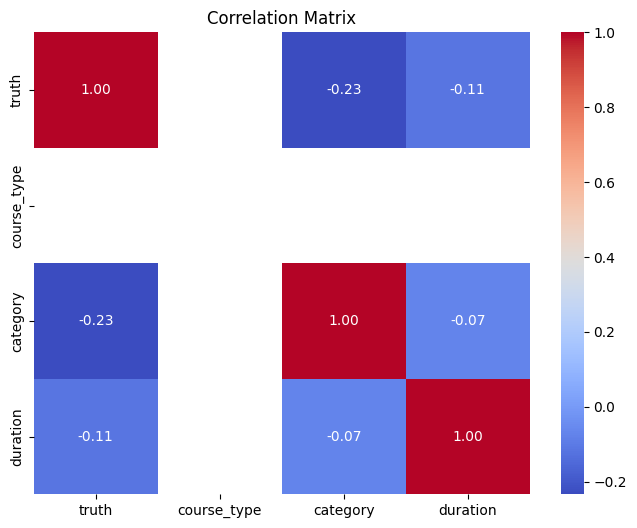

In [ ]:
# Chọn các cột cần phân tích
selected_columns = ['truth', 'course_type', 'category', 'duration']
selected_df = final_merged_df[selected_columns]

# Vẽ ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Nhận xét chung:**
- Hầu hết các mối quan hệ trong biểu đồ tương quan này đều rất yếu (hệ số tương quan gần 0) và không có dấu hiệu tương quan mạnh giữa các biến.
- Điều này có thể ngụ ý rằng các biến trong tập dữ liệu không liên quan chặt chẽ đến nhau hoặc chúng đại diện cho những khía cạnh độc lập.